In [1]:
# Import necessary libraries
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random

# inline plot
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")
print df.dtypes
df.head(4)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S



From the Kaggle site:
```
PassengerId -- A numerical id assigned to each passenger.
Survived -- Whether the passenger survived (1), or didn't (0). We'll be making predictions for this column.
Pclass -- The class the passenger was in -- first class (1), second class (2), or third class (3).
Name -- the name of the passenger.
Sex -- The gender of the passenger -- male or female.
Age -- The age of the passenger. Fractional.
SibSp -- The number of siblings and spouses the passenger had on board.
Parch -- The number of parents and children the passenger had on board.
Ticket -- The ticket number of the passenger.
Fare -- How much the passenger paid for the ticker.
Cabin -- Which cabin the passenger was in.
Embarked -- Where the passenger boarded the Titanic.
```
Best guess based on field types:
```
PassengerId      
Survived         <-- Trying to model this
Pclass           <-- First, second, or third class
Name             <-- Could point to class?
Sex              <-- Women probably more likely to survive
Age              <-- Children more likely to survive
SibSp            <-- I wonder if whole families were more or less likely?
Parch            <-- No idea.
Ticket           <-- Would this have an impact?
Fare             <-- Might point to class
Cabin            <-- Might point to access to boats
Embarked         <-- Might point to access to boats
```

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There's a bunch of random missing age variables, so adding the median age to all those missing.

In [4]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


And what's the deal with the non-numerics'

In [5]:
print df["Sex"].unique() # Cleannnnn
print df["Name"].count() # Complete
print df["Ticket"].count() # Complete
print df["Cabin"].count() # Not a lot
print df["Embarked"].unique() #Only 3-4?


['male' 'female']
891
891
204
['S' 'C' 'Q' nan]


In [6]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

In [7]:
df["Embarked"] = df["Embarked"].fillna('S')
df.loc[df["Embarked"] == 'S',"Embarked"] = 0
df.loc[df["Embarked"] == 'C',"Embarked"] = 1
df.loc[df["Embarked"] == 'Q',"Embarked"] = 2
df["Embarked"].unique()

array([0, 1, 2], dtype=object)

In [8]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0


/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


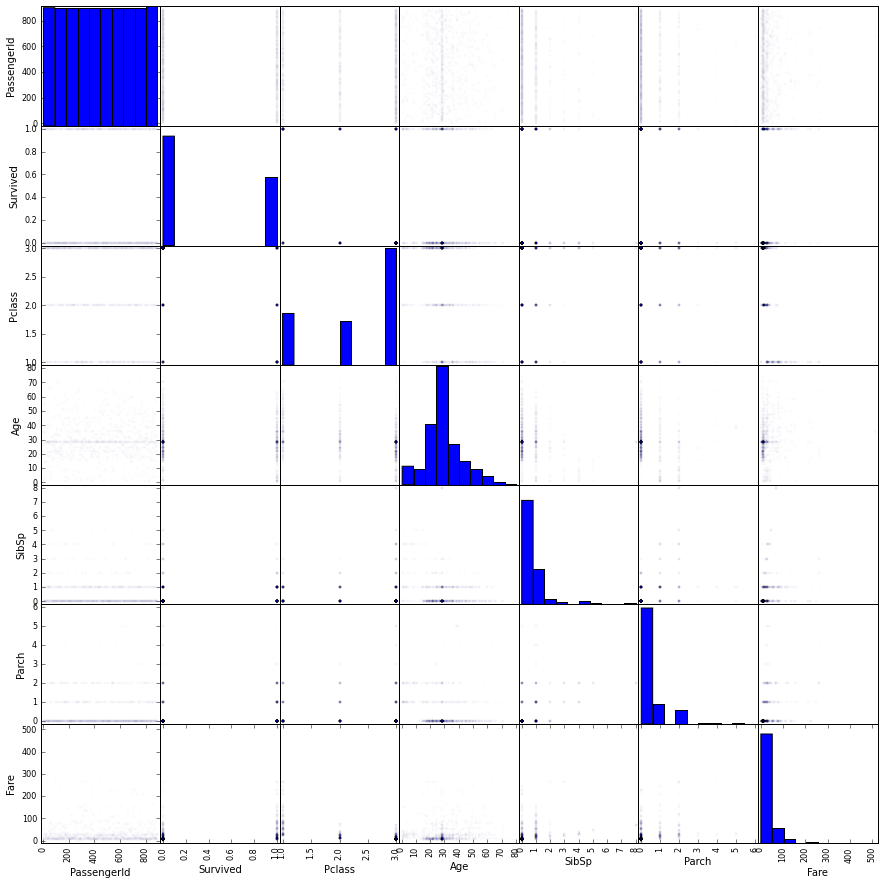

In [9]:
pd.scatter_matrix(df,alpha=0.01,figsize=(15,15), diagonal='hist'); # Semicolon surpresses the random stuff

Basic cleaning done, let's create a linear regression
So far this is taken straight from dataquest, but will comment as I go through

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import KFold

predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

alg = LinearRegression() #linear Regression
kf = KFold(df.shape[0], n_folds=3, random_state=1) #Setup folds

predictions = []
cnt = 0
for train, test in kf:
    #Grab relevent rows according to the training set indicies
    train_predictors = (df[predictors].iloc[train,:])
    # Set Survived as target
    train_target = df["Survived"].iloc[train]
    
    alg.fit(train_predictors,train_target)
    test_predictions=alg.predict(df[predictors].iloc[test,:])
    predictions.append(test_predictions)

Setting up the accuracy score

In [11]:
import numpy as np
predictions = np.concatenate(predictions,axis=0)

In [12]:
predictions[predictions>.5]=1
predictions[predictions<=.5]=0
validated=predictions[predictions==df["Survived"]]

/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  app.launch_new_instance()


In [13]:
acc = validated.sum()/len(predictions)
print "With the above linear regression, we had a {0:.1f}% accuracy".format(acc*100)

With the above linear regression, we had a 78.3% accuracy


In [14]:
from sklearn import cross_validation
alg2 = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg2,df[predictors],df["Survived"],cv=3)
print scores.mean()

0.787878787879


Next up, random forests, and seeing how these work

In [15]:
from sklearn.ensemble import RandomForestClassifier
alg3 = RandomForestClassifier(random_state=1, 
                              n_estimators=10, 
                              min_samples_split=2, 
                              min_samples_leaf=1)
scores = cross_validation.cross_val_score(alg3,
                                          df[predictors],
                                          df["Survived"],
                                          cv=3)
print scores.mean()

0.800224466891


Also what happens when we increase the values in the random forest classifier

In [16]:
alg3 = RandomForestClassifier(random_state=1, 
                              n_estimators=150, 
                              min_samples_split=4, 
                              min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg3,
                                          df[predictors],
                                          df["Survived"],
                                          cv=3)
print scores.mean()

0.819304152637


Let's try to add a few new features to the dataset

In [17]:
df["FamSize"] = df["SibSp"]+df["Parch"]
df["NameLength"] = df["Name"].apply(lambda x: len(x))

Method to snag Title

In [18]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titles = df["Name"].apply(get_title)
print pd.value_counts(titles)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Dr": 5, "Rev": 6, 
                 "Major": 7, "Col": 7, "Mlle": 8, 
                 "Mme": 8, "Don": 9, "Lady": 10, 
                 "Countess": 10, "Jonkheer": 10, 
                 "Sir": 9, "Capt": 7, "Ms": 2}

for key,value in title_mapping.items():
    titles[titles == key] = value
    
print pd.value_counts(titles)

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [20]:
df["Title"] = titles

Next, we have the "Family ID" feature. I wouldn't have thought of this, so puttig int it.
Example name:
```Braund, Mr. Owen Harris```

In [21]:
import operator
family_id_map = {}

def get_family_id(row):
    last_name = row["Name"].split(",")[0]
    family_id = "{0}{1}".format(last_name,row["FamSize"])
    
    if family_id not in family_id_map:
        if len(family_id_map) == 0:
            current_id = 1
        else:
            # I still don't fully get this syntax...
            # I think what it's doing is it's retrieving
            # the max valued item from the id map, and then
            # incrementing the ID value via item getter?
            current_id = (max(family_id_map.items(), 
                              key=operator.itemgetter(1))[1]+1)
        family_id_map[family_id] = current_id
    return family_id_map[family_id]

family_ids = df.apply(get_family_id,axis=1)
family_ids[df["FamSize"]<3] = -1 # Ignore small families?
df["FamilyId"] = family_ids
pd.value_counts(family_ids)

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64

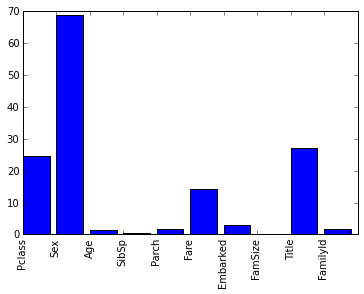

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# update predictors
predictors = ["Pclass", "Sex", "Age", 
              "SibSp", "Parch", "Fare", 
              "Embarked", "FamSize", "Title", 
              "FamilyId"]

selector = SelectKBest(f_classif,k=5)
selector.fit(df[predictors],df["Survived"])

scores = -np.log10(selector.pvalues_) #Hrm

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors, rotation='vertical')
plt.show()

Now update given selector fit

In [23]:
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg4 = RandomForestClassifier(random_state=1, 
                              n_estimators=150, 
                              min_samples_split=8, 
                              min_samples_leaf=4)

scores = cross_validation.cross_val_score(alg4,
                                          df[predictors],
                                          df["Survived"],
                                          cv=3)
print scores.mean()

0.811447811448


Finally using the Gradient Boosting styles through ensembling

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

algo = [
    [GradientBoostingClassifier(random_state=1, 
                                n_estimators=25, 
                                max_depth=3), 
     ["Pclass", "Sex", "Age", "Fare", 
      "Embarked", "FamSize", "Title", 
      "FamilyId"]],
    [LogisticRegression(random_state=1), 
     ["Pclass", "Sex", "Fare", "FamSize", 
      "Title", "Age", "Embarked"]]
]

kf = KFold(df.shape[0], n_folds=3, random_state=1)
predictions = []
for train, test in kf:
    train_target = df["Survived"].iloc[train]
    full_test_predictions = []
    
    for algorithm,predictors in algo:
        # Let's fit to the selected algorithm, against the training index
        algorithm.fit(df[predictors].iloc[train,:],train_target)
        # Run the prediction test
        test_predictions = algorithm.predict_proba(df[predictors].iloc[test,:].astype(float))[:,1]
        
        full_test_predictions.append(test_predictions)
        
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
# print predictions
predictions = np.concatenate(predictions,axis=0)
print sum(predictions[predictions == df["Survived"]])
print len(predictions)
accuracy = sum(predictions[predictions == df["Survived"]]) / len(predictions)
print accuracy

730.0
891
0.819304152637


/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


That was interesting. I was originally getting a result different from the dataquest path, which was `0.819304152637`. My result was about .53. The reason was a tiny typo in my variables: had one thing as pluralized while the other wasn't, and was getting a lower-than-expected result.

This is one of those situations where I'd imagine getting pretty flumuxed, but possibly learned a very good thing there: consistency, but also write our what I _expect_ to get before actually moving on. In this case, because the other models had given high but not the best results, and I'm aiming to increase the qualit yof the models, I'd expect something higher than previous, so "this approach should yield .8 or high."

Anyway. Lesson learned. Onward!